<a href="https://colab.research.google.com/github/JulioFMDB/portfolio/blob/main/analise_acidentespoa_julio_de_bem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho para portfólio de Júlio De Bem

**[My LinkedIn](https://www.linkedin.com/in/juliodebem/)**

**[My GitHub](https://github.com/JulioFMDB)**

**[My personal Instagram](https://www.instagram.com/juliodebem)**

In [1]:
# Importações das libraries que poderei/vou usar
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as date
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
tqdm.pandas()
import folium

# GeoLocator
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [2]:
# pip installs
!pip install geopy
!pip install tqdm
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Análise dos acidentes de trânsito de Porto Alegre
Você atua no departamento de análise de dados da EPTC e o time de gestores(as) precisa de algumas informações sobre os acidentes para avaliar necessidades de ações 
para evitar novas ocorrências.

Assim, com base nos registros disponibilizados, você terá que responder as seguintes perguntas:

Perguntas:

**1)** Como está a evolução dos acidentes nos últimos anos?

**2)** O número de acidentes diminuiu de 2020 para 2022?

**3)** Quais são os tipos de acidentes com maior ocorrência? Moda, mediana e média

**4)** Qual a frequência de óbitos em acidentes nos últimos anos?

**5)** Qual o tipo de acidente com maior número de óbitos?

**Adicionalmente, você é instigado a realizar uma apresentação, com os locais dos acidentes ocorridos ao longo desse ano.**



Aqui está o link para os nossos dados:
https://dadosabertos.poa.br/dataset/acidentes-de-transito-acidentes

In [ ]:
URL_arquivo = 'https://dadosabertos.poa.br/dataset/d6cfbe48-ee1f-450f-87f5-9426f6a09328/resource/b56f8123-716a-4893-9348-23945f1ea1b9/download/cat_acidentes.csv'
#Caminho do arquivo

In [ ]:
df_raw = pd.read_csv(URL_arquivo, sep=';') # Carregando o csv, corrigindo o problema do separados que estava em ;
df_raw.head()

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2022-08-01 01:35:51,0.0,0.0,2020-10-17 00:00:00,1,0,0,0,0,3,...,0.000000,0.000000,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2022-08-01 01:35:51,2473.0,0.0,2017-01-01 00:00:00,1,0,0,0,0,1,...,-51.195897,-30.040376,R VICENTE DA FONTOURA,NaN,ABALROAMENTO,DOMINGO,10:00:00.0000000,DIA,LESTE,NaN
2,2022-08-01 01:35:51,7221.0,0.0,2017-01-01 00:00:00,1,0,0,0,0,1,...,-51.143758,-30.069058,AV BENTO GONCALVES,NaN,ATROPELAMENTO,DOMINGO,19:15:00.0000000,NOITE,LESTE,NaN
3,2022-08-01 01:35:51,229.0,0.0,2017-01-01 00:00:00,1,0,0,0,0,2,...,-51.098735,-30.219852,ESTR DO VAREJAO,NaN,ABALROAMENTO,DOMINGO,22:00:00.0000000,NOITE,SUL,NaN
4,2022-08-01 01:35:51,141.0,0.0,2017-01-02 00:00:00,1,0,0,0,0,0,...,-51.228123,-30.028190,LG JORNALISTA GLENIO PERES,NaN,CHOQUE,SEGUNDA-FEIRA,02:50:00.0000000,NOITE,CENTRO,NaN


In [ ]:
df_raw.shape # Shape do dataset

(67065, 34)

In [ ]:
df_raw.info() # coletei informações do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67065 entries, 0 to 67064
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data_extracao  67065 non-null  object 
 1   predial1       66600 non-null  float64
 2   queda_arr      67065 non-null  float64
 3   data           67065 non-null  object 
 4   feridos        67065 non-null  int64  
 5   feridos_gr     67065 non-null  int64  
 6   mortes         67065 non-null  int64  
 7   morte_post     67065 non-null  int64  
 8   fatais         67065 non-null  int64  
 9   auto           67065 non-null  int64  
 10  taxi           67065 non-null  int64  
 11  lotacao        67065 non-null  int64  
 12  onibus_urb     67065 non-null  int64  
 13  onibus_met     67065 non-null  int64  
 14  onibus_int     67065 non-null  int64  
 15  caminhao       67065 non-null  int64  
 16  moto           67065 non-null  int64  
 17  carroca        67065 non-null  int64  
 18  bicicl

In [ ]:
lat_poa_default = -30.0368 #Variaveis armazenadas da lat/long de POA para depois usar
lon_poa_default = -51.2090

In [ ]:
sel_null = df_raw['longitude'].isnull() # Códigos que inseri posteriormente à análise inicial, para plottar o mapa e algun graficos
df_raw.loc[sel_null == True, 'longitude'] = lon_poa_default

In [ ]:
df_raw[df_raw['longitude']==lon_poa_default].shape

(11311, 34)

In [ ]:
sel_null = df_raw['latitude'].isnull()
df_raw.loc[sel_null == True, 'latitude'] = lat_poa_default

In [ ]:
df_analise = df_raw.copy()

In [ ]:
df_analise.shape

(67065, 34)

# 1) Como está a evolução dos acidentes nos últimos anos?

In [ ]:
exclui_data = df_analise['data'] == '5022-07-15 00:00:00'

df_analise.drop(df_analise[exclui_data == True].index, inplace = True)           # noto um erro na data, ou seja, tem lixo 
                                                                                # no dataset, vou excluir

In [ ]:
df_analise.shape # Tinha 67065 linhas, e drpois a que tinha data com erro

(67064, 34)

In [ ]:
df_analise['data'] = pd.to_datetime(df_analise['data'])  # transformo a data que está como objeto para datetime

In [ ]:
df_analise.head()

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,longitude,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio
0,2022-08-01 01:35:51,0.0,0.0,2020-10-17,1,0,0,0,0,3,...,0.000000,0.000000,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN
1,2022-08-01 01:35:51,2473.0,0.0,2017-01-01,1,0,0,0,0,1,...,-51.195897,-30.040376,R VICENTE DA FONTOURA,NaN,ABALROAMENTO,DOMINGO,10:00:00.0000000,DIA,LESTE,NaN
2,2022-08-01 01:35:51,7221.0,0.0,2017-01-01,1,0,0,0,0,1,...,-51.143758,-30.069058,AV BENTO GONCALVES,NaN,ATROPELAMENTO,DOMINGO,19:15:00.0000000,NOITE,LESTE,NaN
3,2022-08-01 01:35:51,229.0,0.0,2017-01-01,1,0,0,0,0,2,...,-51.098735,-30.219852,ESTR DO VAREJAO,NaN,ABALROAMENTO,DOMINGO,22:00:00.0000000,NOITE,SUL,NaN
4,2022-08-01 01:35:51,141.0,0.0,2017-01-02,1,0,0,0,0,0,...,-51.228123,-30.028190,LG JORNALISTA GLENIO PERES,NaN,CHOQUE,SEGUNDA-FEIRA,02:50:00.0000000,NOITE,CENTRO,NaN


In [ ]:
%time df_analise['ano'] = df_analise['data'].dt.year # checando qual código é mais rápido para usar

CPU times: user 10.1 ms, sys: 0 ns, total: 10.1 ms
Wall time: 10.1 ms


In [ ]:
%time df_analise['ano2'] = df_analise['data'].apply(lambda x : x.strftime('%Y')).astype('int') ## checando qual código é mais rápido para usar

CPU times: user 622 ms, sys: 33.7 ms, total: 655 ms
Wall time: 680 ms


In [ ]:
df_analise

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio,ano,ano2
0,2022-08-01 01:35:51,0.0,0.0,2020-10-17,1,0,0,0,0,3,...,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN,2020,2020
1,2022-08-01 01:35:51,2473.0,0.0,2017-01-01,1,0,0,0,0,1,...,R VICENTE DA FONTOURA,NaN,ABALROAMENTO,DOMINGO,10:00:00.0000000,DIA,LESTE,NaN,2017,2017
2,2022-08-01 01:35:51,7221.0,0.0,2017-01-01,1,0,0,0,0,1,...,AV BENTO GONCALVES,NaN,ATROPELAMENTO,DOMINGO,19:15:00.0000000,NOITE,LESTE,NaN,2017,2017
3,2022-08-01 01:35:51,229.0,0.0,2017-01-01,1,0,0,0,0,2,...,ESTR DO VAREJAO,NaN,ABALROAMENTO,DOMINGO,22:00:00.0000000,NOITE,SUL,NaN,2017,2017
4,2022-08-01 01:35:51,141.0,0.0,2017-01-02,1,0,0,0,0,0,...,LG JORNALISTA GLENIO PERES,NaN,CHOQUE,SEGUNDA-FEIRA,02:50:00.0000000,NOITE,CENTRO,NaN,2017,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67060,2022-08-01 01:35:51,453.0,0.0,2022-07-27,0,0,0,0,0,2,...,R SILVA SO,NaN,COLISÃO,QUARTA-FEIRA,11:50:00.0000000,DIA,LESTE,NaN,2022,2022
67061,2022-08-01 01:35:51,1521.0,0.0,2022-07-27,0,0,0,0,0,1,...,AV DR NILO PECANHA,NaN,ABALROAMENTO,QUARTA-FEIRA,15:20:00.0000000,DIA,LESTE,NaN,2022,2022
67062,2022-08-01 01:35:51,432.0,0.0,2022-07-27,0,0,0,0,0,2,...,AV IPE,AV SATURNINO DE BRITO,ABALROAMENTO,QUARTA-FEIRA,17:55:00.0000000,DIA,LESTE,NaN,2022,2022
67063,2022-08-01 01:35:51,1137.0,0.0,2022-07-28,0,0,0,0,0,2,...,AV PROTASIO ALVES,NaN,COLISÃO,QUINTA-FEIRA,14:35:00.0000000,DIA,LESTE,NaN,2022,2022


In [ ]:
df_analise['ano'].unique()

array([2020, 2017, 2018, 2019, 2021, 2022])

In [ ]:
# sel_anos = df_analise['ano'].isin((2020, 2019, 2021, 2022))
sel_anos = df_analise['ano'] > 2018
sel_anos

0         True
1        False
2        False
3        False
4        False
         ...  
67060     True
67061     True
67062     True
67063     True
67064     True
Name: ano, Length: 67064, dtype: bool

In [ ]:
df_analise = df_analise[sel_anos]

In [ ]:
df_analise.shape

(42130, 36)

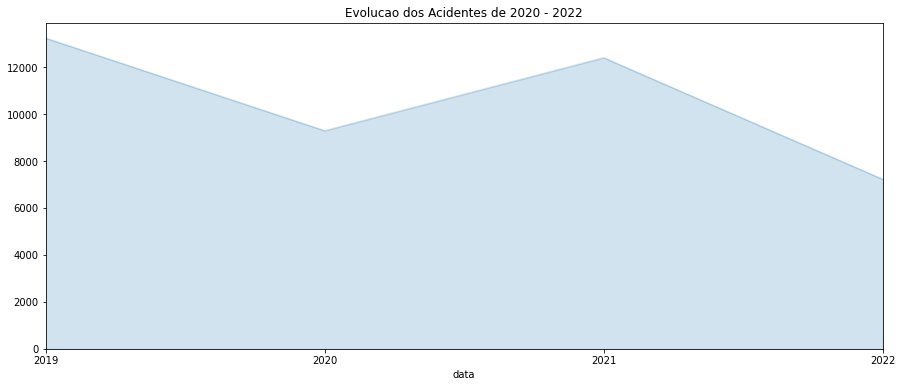

In [ ]:
plt.title('Evolucao dos Acidentes de 2020 - 2022')
df_analise.groupby(pd.Grouper(key='data', freq='y'))['idacidente'].count().plot(kind='area', alpha=.2, figsize=(15,6))
plt.show()

# 2)  O número de acidentes diminuiu de 2020 para 2022?

In [ ]:
year_select = df_analise['ano'] >= 2020
year_select

0         True
24479    False
24482    False
24485    False
24488    False
         ...  
67060     True
67061     True
67062     True
67063     True
67064     True
Name: ano, Length: 42130, dtype: bool

In [ ]:
df_compara_ano = df_analise[year_select == True]

In [ ]:
df_compara_ano.ano.unique()

array([2020, 2021, 2022])

In [ ]:
df_compara_ano.head()

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio,ano,ano2
0,2022-08-01 01:35:51,0.0,0.0,2020-10-17,1,0,0,0,0,3,...,R MARCOS MOREIRA,R GASTON ENGLERT,ABALROAMENTO,SÁBADO,19:00:00.0000000,NOITE,NORTE,NaN,2020,2020
37831,2022-08-01 01:35:51,598.0,0.0,2020-01-01,1,0,0,0,0,0,...,AV BENTO GONCALVES,NaN,ABALROAMENTO,QUARTA-FEIRA,03:00:00.0000000,NOITE,LESTE,NaN,2020,2020
37839,2022-08-01 01:35:51,1271.0,0.0,2020-01-01,1,1,0,0,0,1,...,AV INDEPENDENCIA,NaN,ATROPELAMENTO,QUARTA-FEIRA,23:00:00.0000000,NOITE,LESTE,NaN,2020,2020
37840,2022-08-01 01:35:51,1901.0,0.0,2020-01-02,2,0,0,0,0,0,...,AV EDUARDO PRADO,NaN,ATROPELAMENTO,QUINTA-FEIRA,00:05:00.0000000,NOITE,SUL,NaN,2020,2020
37841,2022-08-01 01:35:51,3302.0,0.0,2020-01-02,1,0,0,0,0,1,...,AV TERESOPOLIS,NaN,ABALROAMENTO,QUINTA-FEIRA,09:00:00.0000000,DIA,SUL,NaN,2020,2020


In [ ]:
df_compara_ano.shape

(28901, 36)

In [ ]:
df_compara_ano = pd.DataFrame(df_compara_ano.groupby(by='ano')['idacidente'].count())

In [ ]:
df_compara_ano.reset_index(inplace=True)
df_compara_ano

,ano,idacidente
0,2020,9287
1,2021,12394
2,2022,7220


In [ ]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

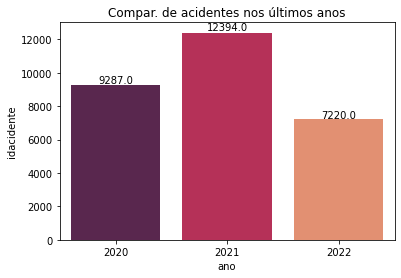

In [ ]:
plt.title('Compar. de acidentes nos últimos anos')
plt.xlabel('Ano')
plt.ylabel('Qtde de acidentes')
# plt.bar(x='ano', height = 'idacidente', data=df_compara_ano)
p = sns.barplot(data=df_compara_ano, x='ano', y='idacidente', palette='rocket', ci=None)
# plt.show()
show_values(p)


# 3. Quais são os tipos de acidentes com maior ocorrência?

In [ ]:
df_aux = df_raw.copy()

In [ ]:
exclui_data = df_aux['data'] == '5022-07-15 00:00:00'

df_aux.drop(df_aux[exclui_data == True].index, inplace = True)

In [ ]:
df_analise_3 = df_aux.copy()

In [ ]:
df_analise_3['tipo_acid'].unique()

array(['ABALROAMENTO', 'ATROPELAMENTO', 'CHOQUE', 'COLISÃO', 'QUEDA',
       'TOMBAMENTO', 'EVENTUAL', 'CAPOTAGEM', 'INCÊNDIO',
       'NAO CADASTRADO'], dtype=object)

In [ ]:
df_tipo_acid = df_analise_3['tipo_acid'].value_counts().to_frame().reset_index()

In [ ]:
df_tipo_acid

,index,tipo_acid
0,ABALROAMENTO,32209
1,COLISÃO,20400
2,CHOQUE,5879
3,ATROPELAMENTO,4069
4,QUEDA,2115
5,EVENTUAL,1066
6,NAO CADASTRADO,663
7,TOMBAMENTO,334
8,CAPOTAGEM,304
9,INCÊNDIO,25


In [ ]:
df_tipo_acid.rename(columns={'tipo_acid':'qtde', 'index':'tipo_acid'}, inplace=True)

In [ ]:
df_tipo_acid

,tipo_acid,qtde
0,ABALROAMENTO,32209
1,COLISÃO,20400
2,CHOQUE,5879
3,ATROPELAMENTO,4069
4,QUEDA,2115
5,EVENTUAL,1066
6,NAO CADASTRADO,663
7,TOMBAMENTO,334
8,CAPOTAGEM,304
9,INCÊNDIO,25


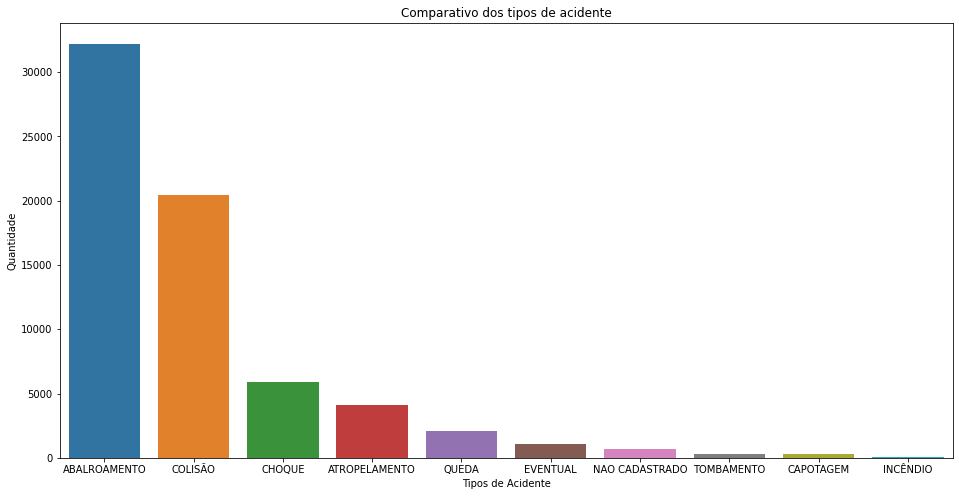

In [ ]:
plt.figure(figsize=(16,8))

sns.barplot(data=df_tipo_acid, x='tipo_acid', y='qtde')
sns.set_theme(style='whitegrid', palette='Reds')
plt.title('Comparativo dos tipos de acidente')
plt.xlabel('Tipos de Acidente')
plt.ylabel('Quantidade')
plt.show()

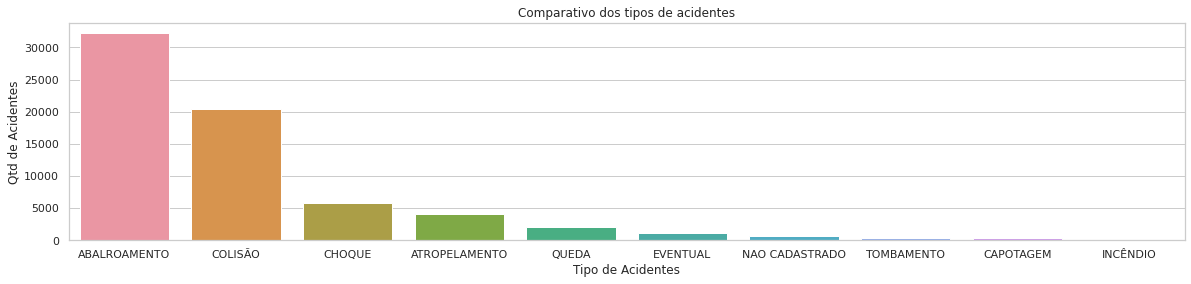

In [ ]:
plt.figure(figsize=(20,4))

sns.barplot(data=df_tipo_acid, x='tipo_acid', y='qtde')
sns.set_theme(style="whitegrid", palette='Blues')
plt.title('Comparativo dos tipos de acidentes')
plt.xlabel('Tipo de Acidentes')
plt.ylabel('Qtd de Acidentes')
plt.show()

In [ ]:
tipo_acidentes = pd.DataFrame(df_analise.groupby(by=['ano','tipo_acid'])['idacidente'].count())
tipo_acidentes.reset_index(inplace=True)

In [ ]:
tipo_acidentes

,ano,tipo_acid,idacidente
0,2019,ABALROAMENTO,6743
1,2019,ATROPELAMENTO,848
2,2019,CAPOTAGEM,52
3,2019,CHOQUE,1063
4,2019,COLISÃO,3852
5,2019,EVENTUAL,190
6,2019,INCÊNDIO,7
7,2019,NAO CADASTRADO,5
8,2019,QUEDA,421
9,2019,TOMBAMENTO,48


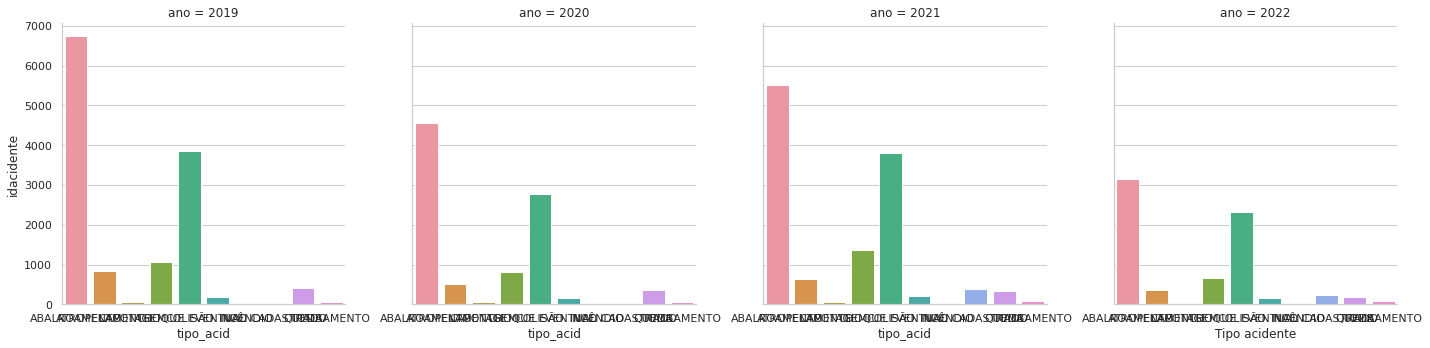

In [ ]:
# plt.figure(figsize=(20,4)) esse gráfico deve ser melhor tratado, mas ele está divido por ano as maiores quantidades de acidente

sns.factorplot(data=tipo_acidentes, x='tipo_acid', y='idacidente', col='ano', kind='bar')
plt.xlabel('Tipo acidente')
plt.show()

# 4) Qual a frequencia de óbitos em acidentes nos últimos anos?

In [ ]:
df_aux['data'] = pd.to_datetime(df_aux['data'])
df_aux['ano'] = df_aux['data'].dt.year

In [ ]:
obitos = df_aux.groupby('ano')['fatais'].sum().to_frame()
obitos.reset_index(inplace=True)
year_select = obitos['ano'] > 2018

obitos = obitos[year_select]
obitos

,ano,fatais
2,2019,74
3,2020,64
4,2021,79
5,2022,39


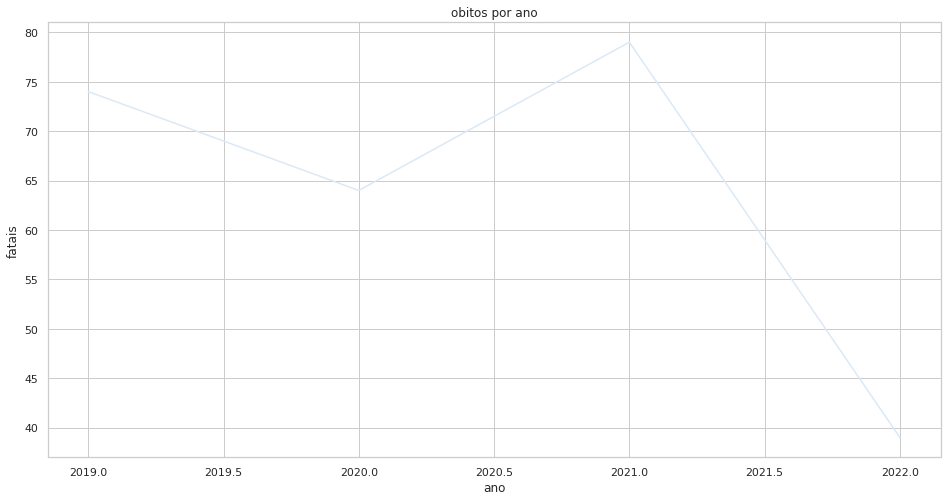

In [ ]:
plt.figure(figsize=(16,8))

sns.lineplot(data=obitos, x='ano', y='fatais')
plt.title('obitos por ano')
plt.xlabel = 'ano'
plt.ylabel = 'qtde'
plt.show()

# 5) Qual o tipo de acidente com maior número de óbitos?

In [ ]:
obitos = pd.DataFrame(df_aux.groupby(['ano','tipo_acid'])['fatais'].sum())
obitos.reset_index(inplace=True)
obitos = obitos.sort_values(by=['fatais'], ascending=False)
obitos

,ano,tipo_acid,fatais
1,2017,ATROPELAMENTO,44
21,2019,ATROPELAMENTO,33
11,2018,ATROPELAMENTO,28
41,2021,ATROPELAMENTO,25
31,2020,ATROPELAMENTO,24
43,2021,CHOQUE,20
30,2020,ABALROAMENTO,19
10,2018,ABALROAMENTO,19
40,2021,ABALROAMENTO,17
0,2017,ABALROAMENTO,17


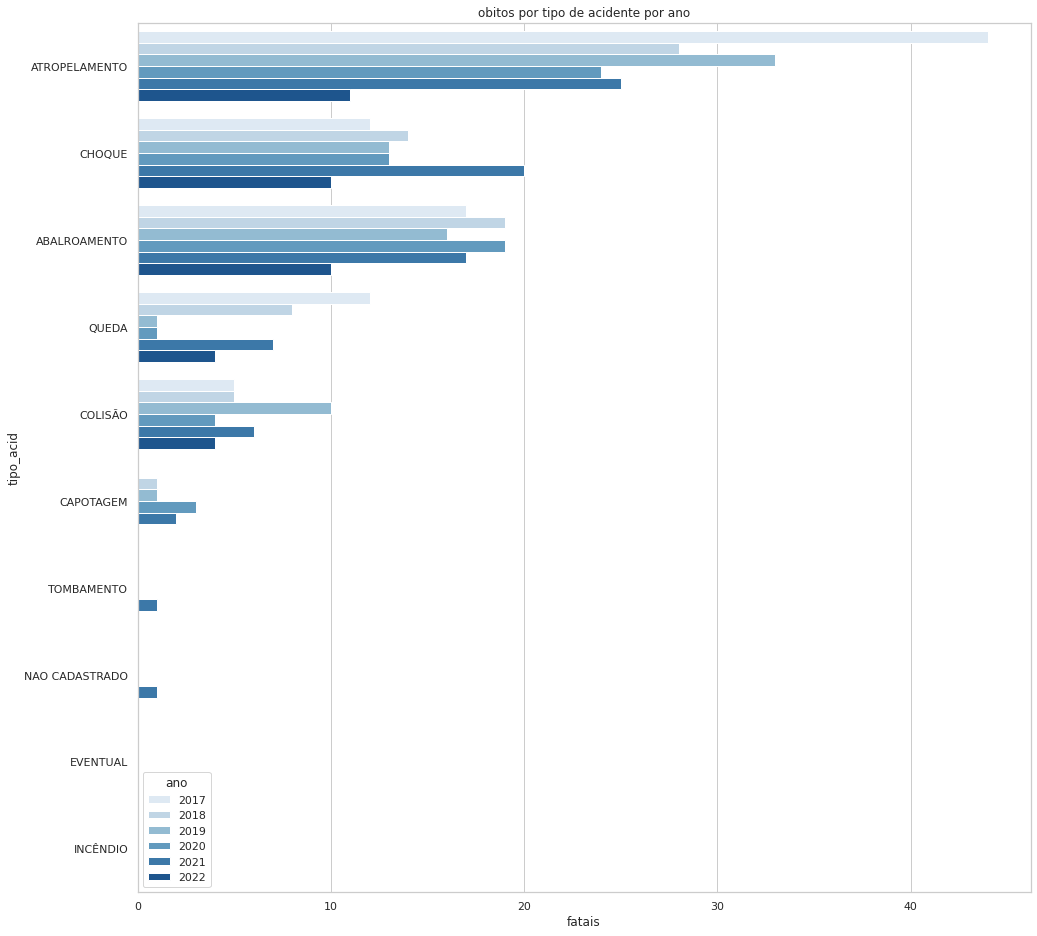

In [ ]:
plt.figure(figsize=(16,16))
sns.barplot(data=obitos, y='tipo_acid', x='fatais', hue='ano')
plt.title('obitos por tipo de acidente por ano')
plt.xlabel = 'qtde'
plt.ylabel = 'tipo por ano'
plt.show()

# Desafio do Mapa:

In [ ]:
# este deu trabalho, muitos códigos pesquisados para poder plotar com exatidão os acidentes

In [ ]:
df_raw_2 = pd.read_csv(URL_arquivo, sep=';')


exclui_data = df_raw_2['data'] == '5022-07-15 00:00:00'

df_raw_2.drop(df_raw_2[exclui_data == True].index, inplace = True)

df_raw_2['data'] = pd.to_datetime(df_raw_2['data'])
df_raw_2['ano'] = df_raw_2['data'].dt.year




df_mapa = df_raw_2[df_raw_2['ano']==2022]
df_mapa.shape

(7220, 35)

In [ ]:
df_mapa = df_mapa[~df_mapa['log1'].isnull()]
df_mapa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7215 entries, 59655 to 67064
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data_extracao  7215 non-null   object        
 1   predial1       6755 non-null   float64       
 2   queda_arr      7215 non-null   float64       
 3   data           7215 non-null   datetime64[ns]
 4   feridos        7215 non-null   int64         
 5   feridos_gr     7215 non-null   int64         
 6   mortes         7215 non-null   int64         
 7   morte_post     7215 non-null   int64         
 8   fatais         7215 non-null   int64         
 9   auto           7215 non-null   int64         
 10  taxi           7215 non-null   int64         
 11  lotacao        7215 non-null   int64         
 12  onibus_urb     7215 non-null   int64         
 13  onibus_met     7215 non-null   int64         
 14  onibus_int     7215 non-null   int64         
 15  caminhao       7

In [ ]:
df_mapa['log1'] = df_mapa['log1'].apply(lambda x : str(x)+ ', Porto Alegre, RS, Brasil')
df_mapa

,data_extracao,predial1,queda_arr,data,feridos,feridos_gr,mortes,morte_post,fatais,auto,...,latitude,log1,log2,tipo_acid,dia_sem,hora,noite_dia,regiao,consorcio,ano
59655,2022-08-01 01:35:51,415.0,0.0,2022-01-01,1,0,0,0,0,2,...,-30.041669,"R JOAO ABBOTT , Porto Alegre, RS, Brasil",AV IJUI,COLISÃO,SÁBADO,20:40:00.0000000,NOITE,LESTE,NaN,2022
59657,2022-08-01 01:35:51,547.0,0.0,2022-01-01,1,0,0,0,0,1,...,-30.015721,"AV FORTE , Porto Alegre, RS, Brasil",NaN,CAPOTAGEM,SÁBADO,09:30:00.0000000,DIA,NORTE,NaN,2022
59659,2022-08-01 01:35:51,4263.0,0.0,2022-01-01,1,1,0,0,0,2,...,-30.061916,"AV BENTO GONCALVES , Porto Alegre, RS, Brasil",NaN,QUEDA,SÁBADO,06:10:00.0000000,DIA,LESTE,NaN,2022
59662,2022-08-01 01:35:51,975.0,0.0,2022-01-01,0,0,0,0,0,2,...,-30.020963,"AV JUSCELINO KUBITSCHEK DE OLIVEIRA , Porto Al...",NaN,ABALROAMENTO,SÁBADO,06:00:00.0000000,DIA,NORTE,NaN,2022
59665,2022-08-01 01:35:51,1.0,0.0,2022-01-02,0,0,0,0,0,1,...,-30.154752,"AV ECON NILO WULFF , Porto Alegre, RS, Brasil",ESTR JOAO ANTONIO SILVEIRA,ABALROAMENTO,DOMINGO,21:00:00.0000000,NOITE,SUL,NaN,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67060,2022-08-01 01:35:51,453.0,0.0,2022-07-27,0,0,0,0,0,2,...,-30.041967,"R SILVA SO , Porto Alegre, RS, Brasil",NaN,COLISÃO,QUARTA-FEIRA,11:50:00.0000000,DIA,LESTE,NaN,2022
67061,2022-08-01 01:35:51,1521.0,0.0,2022-07-27,0,0,0,0,0,1,...,-30.028572,"AV DR NILO PECANHA , Porto Alegre, RS, Brasil",NaN,ABALROAMENTO,QUARTA-FEIRA,15:20:00.0000000,DIA,LESTE,NaN,2022
67062,2022-08-01 01:35:51,432.0,0.0,2022-07-27,0,0,0,0,0,2,...,-30.034057,"AV IPE , Porto Alegre, RS, Brasil",AV SATURNINO DE BRITO,ABALROAMENTO,QUARTA-FEIRA,17:55:00.0000000,DIA,LESTE,NaN,2022
67063,2022-08-01 01:35:51,1137.0,0.0,2022-07-28,0,0,0,0,0,2,...,-30.040210,"AV PROTASIO ALVES , Porto Alegre, RS, Brasil",NaN,COLISÃO,QUINTA-FEIRA,14:35:00.0000000,DIA,LESTE,NaN,2022


In [ ]:
!pip install geopy

In [ ]:
!pip install tqdm

In [ ]:
df_mapa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7215 entries, 59655 to 67064
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data_extracao  7215 non-null   object        
 1   predial1       6755 non-null   float64       
 2   queda_arr      7215 non-null   float64       
 3   data           7215 non-null   datetime64[ns]
 4   feridos        7215 non-null   int64         
 5   feridos_gr     7215 non-null   int64         
 6   mortes         7215 non-null   int64         
 7   morte_post     7215 non-null   int64         
 8   fatais         7215 non-null   int64         
 9   auto           7215 non-null   int64         
 10  taxi           7215 non-null   int64         
 11  lotacao        7215 non-null   int64         
 12  onibus_urb     7215 non-null   int64         
 13  onibus_met     7215 non-null   int64         
 14  onibus_int     7215 non-null   int64         
 15  caminhao       7

In [ ]:
enderecos = df_mapa[df_mapa['latitude'].isnull()]
enderecos.shape

(355, 35)

In [ ]:
geolocator = Nominatim(user_agent='app_tt')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1)

In [ ]:
enderecos['coordenadas'] = enderecos['log1'].progress_apply(geocode) # Demora alguns minutos

100%|██████████| 355/355 [05:54<00:00,  1.00it/s]


In [ ]:
enderecos['latitude'].head()

59735   NaN
59738   NaN
59839   NaN
59841   NaN
59869   NaN
Name: latitude, dtype: float64

In [ ]:
enderecos.iloc[2,35][1][0]

-30.0476968

In [ ]:
enderecos['latitude'] = enderecos['coordenadas'].apply(lambda loc : loc.point[0] if loc else None)
enderecos['longitude'] = enderecos['coordenadas'].apply(lambda loc : loc.point[1] if loc else None)

In [ ]:
enderecos['latitude'].head()

59735   -30.022856
59738   -30.034687
59839   -30.047697
59841   -29.999285
59869   -30.079754
Name: latitude, dtype: float64

In [ ]:
enderecos[['log1','latitude', 'longitude']].head()

,log1,latitude,longitude
59735,"AV JOAO WALLIG , Porto Alegre, RS, Brasil",-30.022856,-51.163536
59738,"R ENG TEIXEIRA SOARES , Porto Alegre, RS, Brasil",-30.034687,-51.190463
59839,"R ENG ANTONIO CARLOS TIBIRICA , Porto Alegre, ...",-30.047697,-51.177349
59841,"AV SERTORIO , Porto Alegre, RS, Brasil",-29.999285,-51.202146
59869,"R PROF CLEMENTE PINTO , Porto Alegre, RS, Brasil",-30.079754,-51.211577


In [ ]:
enderecos = enderecos[~enderecos['latitude'].isnull()]
enderecos.shape

(342, 36)

In [ ]:
enderecos.drop(columns='coordenadas', inplace=True)

In [ ]:
df_mapa.shape


(7215, 35)

In [ ]:
enderecos.shape

(342, 35)

In [ ]:
df_mapa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7215 entries, 59655 to 67064
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data_extracao  7215 non-null   object        
 1   predial1       6755 non-null   float64       
 2   queda_arr      7215 non-null   float64       
 3   data           7215 non-null   datetime64[ns]
 4   feridos        7215 non-null   int64         
 5   feridos_gr     7215 non-null   int64         
 6   mortes         7215 non-null   int64         
 7   morte_post     7215 non-null   int64         
 8   fatais         7215 non-null   int64         
 9   auto           7215 non-null   int64         
 10  taxi           7215 non-null   int64         
 11  lotacao        7215 non-null   int64         
 12  onibus_urb     7215 non-null   int64         
 13  onibus_met     7215 non-null   int64         
 14  onibus_int     7215 non-null   int64         
 15  caminhao       7

In [ ]:
df_mapa = df_mapa[~df_mapa['latitude'].isnull()]

In [ ]:
df_mapa.shape

(6860, 35)

In [ ]:
df_mapa_final = pd.concat([df_mapa, enderecos])

In [ ]:
df_mapa_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7202 entries, 59655 to 66960
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data_extracao  7202 non-null   object        
 1   predial1       6749 non-null   float64       
 2   queda_arr      7202 non-null   float64       
 3   data           7202 non-null   datetime64[ns]
 4   feridos        7202 non-null   int64         
 5   feridos_gr     7202 non-null   int64         
 6   mortes         7202 non-null   int64         
 7   morte_post     7202 non-null   int64         
 8   fatais         7202 non-null   int64         
 9   auto           7202 non-null   int64         
 10  taxi           7202 non-null   int64         
 11  lotacao        7202 non-null   int64         
 12  onibus_urb     7202 non-null   int64         
 13  onibus_met     7202 non-null   int64         
 14  onibus_int     7202 non-null   int64         
 15  caminhao       7

In [ ]:
amostra = df_mapa_final.sample(50)

In [ ]:
amostra.shape

(50, 35)

In [ ]:
poa = folium.Map(
    location = [lat_poa_default, lon_poa_default]
    ,zoom_start = 12
)

In [ ]:
for index, linha in amostra.iterrows():
    folium.Marker(
        [linha['latitude'], linha['longitude']]
        ,popup = linha['tipo_acid'] + ' ' + str(linha['data'])
    ).add_to(poa)

In [ ]:
poa # Grafico extra